# Lösungen

## Konfiguration und Python-Pakete

In [1]:
import numpy as np
import scipy.linalg as la  # or: from scipy import linalg as la
import scipy.optimize as op
import matplotlib.pyplot as plt

## Aufgabe 1: Partielle Ableitungen, ideales Gas, ÖPNV

1. **Ideales Gas:** Das Volumen $V$ einer bestimmten Menge eines idealen Gases ist durch die Temperatur $T$ und den Druck $p$ über die Formel $V = 0.08\frac{T}{p}$ gegeben. Berechnen und interpretieren Sie $\frac{\partial V}{\partial p}$ und $\frac{\partial V}{\partial T}$ bei $p = 20$ und $T = 300$.
2. **Öffentlicher Personennahverkehr:** In einer Vorstadt haben Pendler die Möglichkeit mit dem Bus oder mit dem Zug in das Stadtzentrum zu kommen. Die Nachfrage nach diesen Verkehrsarten variiert mit ihrer Kosten. Sei $B(b, z)$ die Anzahl der Menschen, die mit dem Bus fahren wird, wenn $b$ der Preis für den Bus und $z$ der Preis der Zug sind. Zum Beispiel: Bei $B(4, 6) = 7000$ nehmen 7000 Pendler den Bus, wenn der Preis den Bus $4$ ist und der Preis für den Zug $6$ ist. Erklären Sie, warum $\frac{\partial B}{\partial b} <0$ und $\frac{\partial B}{\partial z}> 0$ gelten. 

### Lösung

1. $\frac{\partial V}{\partial p}(p,T) = -0.08\frac{T}{p^2}$ und $\frac{\partial V}{\partial T}(p,T) = 0.08\frac{1}{p}$. Daher ist $\frac{\partial V}{\partial p}(20, 300) = -0{,}06$ (Volumen wird kleiner bei steigendem Druck und gleichbleibender Temperatur) und $\frac{\partial V}{\partial T}(20, 300) = 0{,}004$ (Volumen wird größer bei steigender Temperatur und gleichbleibendem Druck)
2. $\frac{\partial B}{\partial b} <0$ weil steigende Buspreise bei gleichbleibenden Zugpreisen zu weiniger Verwendern der Busse führen, und $\frac{\partial B}{\partial z}> 0$ weil umgekehrt steigende Zugpreise bei gleichbleibenden Buspreisen zu mehr Verwendern der Busse führen.

## Aufgabe 2: Wärmeleitungsgleichung

Zeigen Sie, dass die Temperaturfunktion

$$T(x,t)= \frac{1}{\sqrt{t}}e^{-\frac{x^2}{4t}}$$

die Wärmeleitungsgleichung

$$\frac{\partial T}{\partial t}(x,t)= \frac{\partial^2 T}{\partial x^2}(x,t)$$

erfüllt. Plotten Sie die örtliche Temperaturverteilung für einige verschiedene Zeiten. Interpretieren Sie die Wärmeleitungsgleichung und die spezielle Lösung $T(x,t)$.

### Lösung

$\frac{\partial T}{\partial t}(x,t)$ berechnet sich mittels Produkt- und Kettenregel zu $e^{-\frac{x^2}{4t}}\left( -\frac{1}{2\sqrt{t^3}} + \frac{x^2}{4\sqrt{t^5}} \right)$.
$\frac{\partial T}{\partial x}(x,t)$ berechnet sich mittels Kettenregel zu $-\frac{1}{2\sqrt{t^3}}xe^{-\frac{x^2}{4t}}$ und daraus berechnet sich $\frac{\partial^2 T}{\partial x^2}(x,t)$ mittels Produkt- und Kettenregel zu $e^{-\frac{x^2}{4t}}\left( -\frac{1}{2\sqrt{t^3}} + \frac{x^2}{4\sqrt{t^5}} \right)$.
Der Vergleich zeigt. dass $\frac{\partial T}{\partial t}(x,t)= \frac{\partial^2 T}{\partial x^2}(x,t)$
erfüllt ist.

Interpretationen:

- Wärmeleitungsgleichung: Die zeitliche Änderung ist gleich der örtlichen Krümmung. Wenn bei $(x,t)$ die Temperatur höher ist als in der örtlichen Umgebung, dann sinkt sie anschließend. Umgekehrt, wenn bei $(x,t)$ die Temperatur niedriger ist als in der örtlichen Umgebung, dann steigt sie anschließend.
- Lösung $T(x,t)$: Gaußglocke, die bei $x=0$ zentriert ist und mit der Zeit "schmilzt", d. h. breiter und niedriger wird.

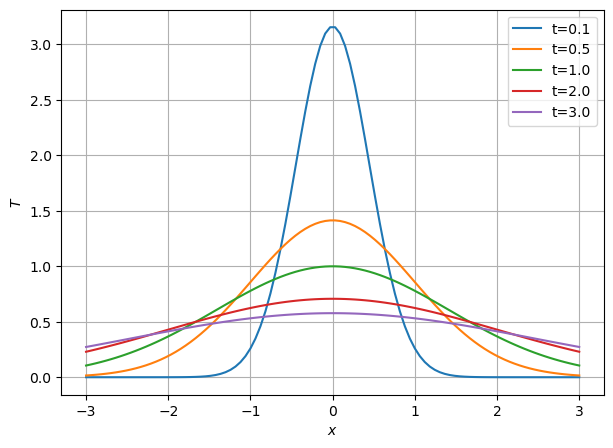

In [2]:
x = np.linspace(-3, 3, num=100)
times = np.array([0.1, 0.5, 1, 2, 3])

plt.figure(figsize=(7, 5))
for t in times:
    T = 1/np.sqrt(t)*np.exp(-x**2/(4*t))
    plt.plot(x, T, label=f"{t=}")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$T$")
plt.grid(True)

## Aufgabe 3: lineare Approximation und Funktionswertdifferenz

Berechnen Sie das Differential der Funktion 
$f:\mathbb{R}^2 \rightarrow\mathbb{R}: z(x, y) = e^{-(3x^2 + y^2)}$ allgemein und im Speziellen bei $(x_0, y_0)=(1,2)$. Wie groß ist der Unterschied zwischen der linearen Approximation $\text{d}z$ der Funktionswertdifferenz und der wahren Funktionswertdifferenz $\Delta z$ bei $(x_0, y_0)$, wenn $\text{d}x = 0.1$ und $\text{d}y = -0.2$?

### Lösung

$\text{d}z = \frac{\partial z}{\partial x}\text{d}x + \frac{\partial z}{\partial y} \text{d}y = e^{-(3x^2 + y^2)}(-6x) \text{d}x + e^{-(3x^2 + y^2)}(-2y) \text{d}y$, 
$\Delta z (1,2) = e^{-(3(1.1)^2 + (1.8)^2)} - e^{-(3(1)^2 + (2)^2)}$,
$\text{d}z (1,2) = e^{-7}(-6) 0.1 + e^{-7}(-4) (-0.2)$.
Siehe Code:

In [4]:
def z(x, y):
    return np.exp(-(3*x**2 + y**2))

def dz(x_0, y_0, dx, dy):
    return -np.exp(-(3*x_0**2 + y_0**2))*6*x_0*dx - np.exp(-(3*x_0**2 + y_0**2))*2*y_0*dy

x_0 =  1
y_0 =  2
dx  =  0.1
dy  = -0.2

print(f"wahre Differenz = {z(x_0 + dx, y_0 + dy) - z(x_0, y_0):.10f}")
print(f"linear approximierte Differenz = {dz(x_0, y_0, dx, dy):.10f}")

wahre Differenz = 0.0001265951
linear approximierte Differenz = 0.0001823764


## Aufgabe 4: Wärmeverlust in einem Gebäude - Teil 1, partielle Ableitungen

Ein rechteckiges Industriegebäude habe die Länge $x$, die Breite $y$ und die Höhe $z$. In der Tabelle ist der Wärmeverlust pro Tag durch jede Seite des Gebäudes in geeigneten Energieeinheiten pro Quadratmeter Seitenfläche angegeben. 

| Dach | Ostseite | Westseite | Nordseite | Südseite | Boden |
|------|----------|-----------|-----------|----------|-------|
| 10   | 8        | 6         | 10        | 5        | 1     |

Der gesamte tägliche Wärmeverlust des Gebäudes sei mit Sei $Q(x, y, z)$ bezeichnet.

1. Finden Sie eine Formel für $Q(x, y, z)$.
2. Geben Sie den gesamten täglichen Wärmeverlust an, wenn das Gebäude 30 Meter lang, 12 Meter breit und 9 Meter hoch ist.
3. Berechnen und interpretieren Sie $\frac{\partial Q}{\partial x} (30, 12, 9)$, $\frac{\partial Q}{\partial y}(30, 12, 9)$ und $\frac{\partial Q}{\partial z} (30, 12, 9)$.

### Lösung

1. $Q(x,y,z) = 10xy + 8yz + 6yz + 10xz + 5xz + 1xy = 11xy + 14yz + 15xz$
2. $Q(30, 12, 9)$, siehe Code
3. Siehe Code

In [4]:
def Q(x,y,z):
    return 11*x*y + 14*y*z + 15*x*z

def Q_x(x,y,z):
    return 11*y + 15*z

def Q_y(x,y,z):
    return 11*x + 14*z

def Q_z(x,y,z):
    return 14*y + 15*x

x_0 = 30
y_0 = 12
z_0 =  9

print(f"gesamter täglicher Wärmeverlust        = {Q(x_0, y_0, z_0):8.2f}")
print(f"Wärmeverlust pro Meter Längenänderung  = {Q_x(x_0, y_0, z_0):8.2f}")
print(f"Wärmeverlust pro Meter Breitenänderung = {Q_y(x_0, y_0, z_0):8.2f}")
print(f"Wärmeverlust pro Meter Höhennänderung  = {Q_z(x_0, y_0, z_0):8.2f}")

gesamter täglicher Wärmeverlust        =  9522.00
Wärmeverlust pro Meter Längenänderung  =   267.00
Wärmeverlust pro Meter Breitenänderung =   456.00
Wärmeverlust pro Meter Höhennänderung  =   618.00


## Aufgabe 5: Lineare Fehlerfortpflanzung

Für den Radius $R$ und die Dichte $\rho$ einer homogenen Kugel wurden die Mittelwerte 
$\bar{R} = 12.2$ cm und $\bar{\rho} = 2.50$ g/cm$^3$ ermittelt. 
Eine Schätzung der zugehörigen Messunsicherheiten ergab 
$\Delta R = 0.15$ cm und $\Delta \rho = 0.11$ g/cm$^3$.

1. Welche Masse, als indirekt berechneten Mittelwert $\bar{m}$, besitzt die Kugel?
2. Mit welchem Maximalwert $\Delta m_{\text{max}}$ für die Messunsicherheit von $m$ muss man dabei rechnen?
3. Wie lautet das Messergebnis für die Masse $m$?

### Lösung

*Quelle:* Papula Band 2, Abschnitt 2.5.5, Übungsaufgabe 35 auf Seite 338

$m(R,\rho) = \rho V = \rho \frac{4}{3}\pi R^3$, 
$\bar{m} = \bar{\rho} \frac{4}{3}\pi \bar{R}^3 = 19015.5\,\text{g} = 19.0155\,\text{kg}$,

$$\begin{align}
\Delta m_{\text{max}} &= \left\vert\frac{\partial m}{\partial R}(\bar{R},\bar{\rho})\,\Delta R \right\vert + \left\vert\frac{\partial m}{\partial \rho}(\bar{R},\bar{\rho})\,\Delta \rho \right\vert \\
&= \bar{\rho} 4\pi \bar{R}^2 \Delta R + \frac{4}{3}\pi \bar{R}^3 \Delta \rho \\
&= 1538.1\,\text{g} = 1.5381\,\text{kg}
\end{align}$$

$m = (19.0155 \pm 1.5381)$ kg

## Aufgabe 6: Lineare Fehlerfortpflanzung

Die Leistung eines Gleichstroms wird nach der Formel $P = RI^2$ berechnet, vgl. [Wikipedia: Elektrische Leistung](https://de.wikipedia.org/wiki/Elektrische_Leistung).
Widerstand $R$ und Stromstärke $I$ wurden in einem Praktikumsversuch wie folgt gemessen:

$$\begin{align}
R &= (80.0 \pm 1.0) \,\Omega \\
I &= ( 6.2 \pm 0.1) \,\text{A}
\end{align}$$

Geben Sie das Messergebnis für $P$ an.

### Lösung

*Quelle:* Papula Klausur- und Übungsaufgaben, Aufgabe E59 auf Seite 275 f.

$P = (3075 \pm 138)$ W

## Aufgabe 7: nicht-lineare Optimierung ohne Nebenbedingungen

Gesucht ist das Extremum der Funktion $f(x, y) = 2x^2 - xy - 2y + y^2$. An welcher Stelle befindet es sich, und um welche Art von Extremum handelt es sich?

### Lösung

*Quelle:* Sanal: Mathematik für Ingenieure. p. 583, Bsp. 11.61

Optimalitätsbedingung $\nabla f = 0$ liefert einen kritischen Punkt mit $x = \frac{2}{7}$ und $y = \frac{8}{7}$. 
Die Hessematrix von $f$ ist dort positiv definit, sodass dort ein Minimum vorliegt.

## Aufgabe 8: Profitmaximierung, nicht-lineare Optimierung ohne Nebenbedingungen

Die Energie GmbH investiert 20.000 EUR in das Design und die Entwicklung eines neuen Produkts. Sie kann es für 2 EUR pro Stück herstellen. Wenn die Energie GmbH $a$ EUR für Marketing ausgibt und das Produkt mit einem Stückpreis von $p$ EUR anbietet, dann verkauft sie $2000 + 4\sqrt{a} - 20p$ Stück.

1. Bestimmen Sie den Profit der Energie GmbH als Funktion $f(a, p)$.
2. Bei welchem Stückpreis $p$ und bei welchen Marketingkosten $a$ ist der erzielte Profit maximal? Lösen Sie dieses Problem von Hand und numerisch mit Hilfe der Funktion [`root`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).

### Lösung

1. $f(a,p) = -20000 + (p - 2)(2000 + 4\sqrt{a} - 20p) - a$
2. $\frac{\partial f}{\partial a}(a,p) = 0$ liefert $\sqrt{a}=2(p-2)$.
   $\frac{\partial f}{\partial p}(a,p) = 0$ liefert $2040 + 4\sqrt{a} - 40p = 0$
   Einsetzen der ersten in die zweite Gleichung liefert 
   $p = 63.25$ EUR/Stück und $a = 15006.25$ EUR. Um sich sicher zu sein, dass an dieser Stelle ein Maximum vorliegt, berechnen wir dort die Eigenwerte der Hessematrix $H = \begin{pmatrix} \frac{2 - p}{\sqrt{a^3}} & \frac{2}{\sqrt{a}} \\ \frac{2}{\sqrt{a}} & -40 \end{pmatrix}$, siehe Code.   

In [5]:
p = 63.25
a = 15006.25

H = np.array([[ (2 - p)/a**1.5   , 2/np.sqrt(a)], 
              [      2/np.sqrt(a),         -40 ]])
print(f"Hessian matrix at critical point = \n{H}.")

L, V = la.eig(H)
print(f"eigenvalues of Hessian matrix at critical point: \n{L}")

Hessian matrix at critical point = 
[[-3.33194502e-05  1.63265306e-02]
 [ 1.63265306e-02 -4.00000000e+01]].
eigenvalues of Hessian matrix at critical point: 
[-2.66555557e-05+0.j -4.00000067e+01+0.j]


In [6]:
def my_grad(x):  # gradient, x = [a,p]
    a = x[0]
    p = x[1]
    return [2*(p - 2)/np.sqrt(a) - 1,
            2040 + 4*np.sqrt(a) - 40*p]

sol = op.root(my_grad, [3, 3])
print("return value of optimize.root() command: {}".format(sol))
print("solution x = {}".format(sol.x))

return value of optimize.root() command:     fjac: array([[-0.04270997,  0.99908751],
       [-0.99908751, -0.04270997]])
     fun: array([-1.90271354e-10,  1.01226760e-09])
 message: 'The solution converged.'
    nfev: 74
     qtf: array([-7.33736389e-09, -1.05739542e-09])
       r: array([ 2.09213765e-02, -5.13968371e+01,  4.47490809e-02])
  status: 1
 success: True
       x: array([15006.25000712,    63.25      ])
solution x = [15006.25000712    63.25      ]


## Aufgabe 9: Kontourplot, kritische Punkte, Gradientenfeld

Gegeben ist die Funktion $z(x,y) = -x^3 + y^2 + 12x - 6y - 5$.

1. Erstellen Sie den Graphen und den Konturplot von $z(x,y)$ im Bereich $x\in[-4,4]$ und $y\in[-8,8]$.
2. Finden Sie alle kritischen Punkte von $z(x,y)$ und bestimmen Sie, welche ein lokales Minimum, Maximum oder Sattelpunkt sind.
3. Verwenden Sie den Python-Befehl `quiver`, um das Gradientenfeld $\nabla z$ in Ihren  Konturplot einzuzeichnen. Hier ein Beispiel dazu für eine andere Funktion:

  ```python
  x = np.arange(0, 3*np.pi, .25)
  y = np.arange(0, 3*np.pi, .25)
  X,Y = np.meshgrid(x, y)
  
  # Funktion z(x,y)
  Z = np.sin(.75*X) - np.cos(Y)

  # Gradientenfeld
  U = .75*np.cos(.75*X)
  V = np.sin(Y)

  plt.figure(figsize=(8,6))
  CS = plt.contour(X, Y, Z, 15)
  Q = plt.quiver(X,Y, U,V)
  plt.xlabel('x')
  plt.ylabel('y')
  ```

### Lösung

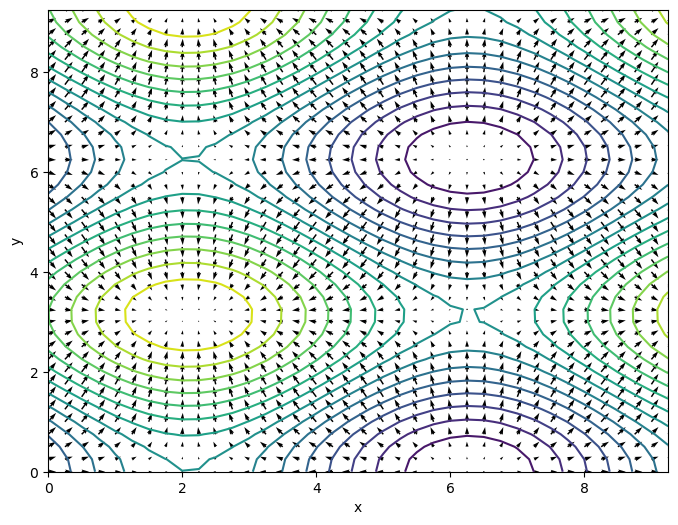

In [7]:
x = np.arange(0, 3*np.pi, .25)
y = np.arange(0, 3*np.pi, .25)
X, Y = np.meshgrid(x, y)

# Funktion z(x,y)
Z = np.sin(.75*X) - np.cos(Y)

# Gradientenfeld
U = .75*np.cos(.75*X)
V = np.sin(Y)

plt.figure(figsize=(8,6))
CS = plt.contour(X, Y, Z, 15)
Q = plt.quiver(X,Y, U,V)
plt.xlabel('x')
plt.ylabel('y');

1. Siehe Code
2. $\nabla z = 0$ liefert die kritischen Punkte bei $x= \pm2$ und $y=3$. 
   Die Hesse-Matrix lautet $H = \begin{pmatrix} -6x & 0 \\ 0 & 2 \end{pmatrix}$. 
   Ihre Eigenwerte bei $(2,3)$ sind -12 und 2. Daher ist $H$ bei $(2,3)$ indefinit und $(2,3)$ ist ein Sattelpunkt. 
   Ihre Eigenwerte bei $(-2,3)$ sind 12 und 2. Daher ist $H$ bei $(2,3)$ positiv definit und $(-2,3)$ ist ein lokales Minimum. 
   Siehe Code.
3. Siehe Code.

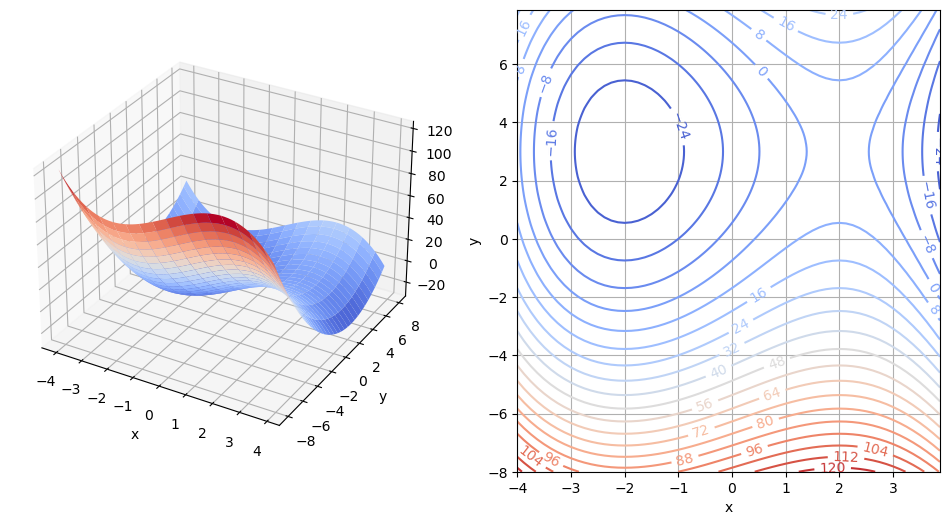

In [5]:
x = np.arange(-4, 4, 0.125)
y = np.arange(-8, 8, 0.125)
X, Y = np.meshgrid(x, y)

Z = -X**3 + Y**2 + 12*X - 6*Y - 5

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p  = ax.plot_surface(X, Y, Z,
      rstride=4, cstride=4, linewidth=0, cmap='coolwarm')
ax.view_init(azim=-60, elev=30)
plt.xlabel('x')
plt.ylabel('y')

fig.add_subplot(1, 2, 2)
CS = plt.contour(X, Y, Z, 20, cmap='coolwarm')  # colormaps()
plt.clabel(CS, inline=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [6]:
H1 = np.array([[-12, 0],
               [  0, 2]])
print(la.eig(H1)[0])

H2 = np.array([[12, 0],
               [ 0, 2]])
print(la.eig(H2)[0])

[-12.+0.j   2.+0.j]
[12.+0.j  2.+0.j]


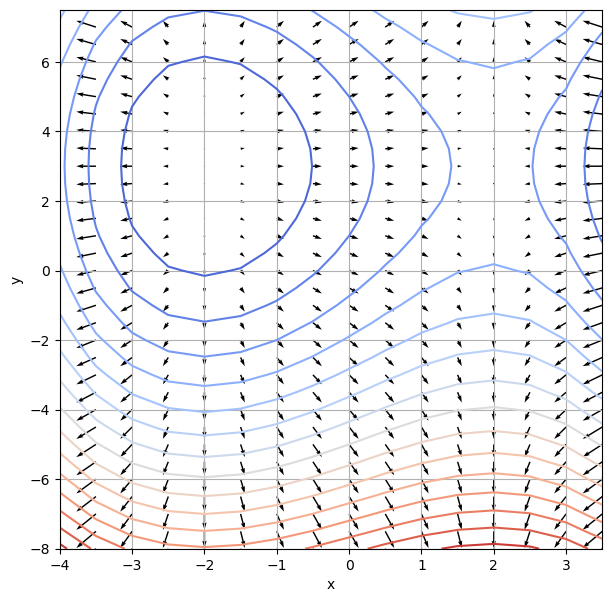

In [7]:
x = np.arange(-4, 4, .5)
y = np.arange(-8, 8, .5)
X, Y = np.meshgrid(x, y)

Z = -X**3 + Y**2 + 12*X - 6*Y - 5
U = -3*X**2 + 12
V = 2*Y - 6

plt.figure(figsize=(7, 7))
CS = plt.contour(X, Y, Z, 15, cmap='coolwarm')
Q = plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Aufgabe 10: Design eines Schwimmbeckens, Lagrange-Multiplikatoren

Ein quaderförmiges Schwimmbecken mit einem Fassungsvermögen (Volumen) von $V = 108 \text{ m}^3$ soll so gebaut werden, dass die Oberfläche (Boden und Seitenwände) möglichst klein wird. Wie sind die Abmessungen des Beckens zu wählen?

### Lösung

*Quelle:* Papula: Klausur- und Übungsaufgaben - Auflage 4, Aufgabe E71

Länge $x$, Breite $y$, Höhe/Tiefe $z$.
Maximiere $f(x,y,z) = xy + 2xz + 2yz$ unter $g(x,y,z) = xyz - 108 = 0$.
Die Methode der Lagrange-Multiplikatoren liefert die optimalen Werte $x=y=2z=6$. 

Siehe Lothar Papula: Klausur- und Übungsaufgaben. Auflage 4, Aufgabe E71.

## Aufgabe 11: Wärmeverlust in einem Gebäude - Teil 2, Lagrange-Multiplikatoren

Ein rechteckiges Industriegebäude habe die Länge $x$, die Breite $y$ und die Höhe $z$. In der Tabelle ist der Wärmeverlust pro Tag durch jede Seite des Gebäudes in geeigneten Energieeinheiten pro Quadratmeter Seitenfläche angegeben. 

| Dach | Ostseite | Westseite | Nordseite | Südseite | Boden |
|------|----------|-----------|-----------|----------|-------|
| 10   | 8        | 6         | 10        | 5        | 1     |

Der gesamte tägliche Wärmeverlust des Gebäudes ist daher durch $Q(x,y,z) = 11xy + 14yz +15xz$ gegeben.

Berechnen Sie die Abmessungen jenes Gebäudes mit einem Volumen von 18480 Kubikmetern, das den minimalen Gesamtwärmeverlust pro Tag hat. 

### Lösung

Wir schreiben die Nebenbedingung als $g(x,y,z) = xyz - 18480 = 0$. 
Die Optimalitätsbedingung $\nabla Q = \lambda\nabla g$ liefert das nicht-lineares 3x3-Gleichungssystem

\begin{align}
11y + 15z = & \lambda yz \\
11x + 14z = & \lambda xz \\
14y + 15x = & \lambda xy.
\end{align}
Freistellen von $\lambda$ in jeder Gleichung und Gleichsetzen der Terme der ersten mit der zweiten und der zweiten mit der dritten Gleichung liefert $x=\frac{14}{15}y$ sowie $z=\frac{11}{15}y$. Einsetzen dieser Zwischenergebnisse in die Nebenbedingung ergibt die Lösung $x = 28, y = 30, z = 22$.

In [11]:
y = (18480*(15**2)/(14*11))**(1/3)
x = 14/15*y
z = 11/15*y

print(f"{x = :.2f}")
print(f"{y = :.2f}")
print(f"{z = :.2f}")

x = 28.00
y = 30.00
z = 22.00


## Aufgabe 12: Produktionsmöglichkeitenkurve und optimaler Produktionsplan, Lagrange-Multiplikatoren

Ein Unternehmen stellt zwei Produkte A und B her, die das gleiche Rohmaterial verwenden. Das verfügbare Rohmaterial und die verfügbare Arbeitszeit sind begrenzt. Daher muss das Unternehmen entscheiden, wie viel seiner Ressourcen der Produktion von A und wie viel B zugeordnet werden. Es bezeichne $x$ die Produktionsmenge von A und $y$ die Produktionsmenge von B. Wir nehmen an, dass die Resourcenbeschränkung folgender Gleichung entspricht:

$$9x^2 + 4y^2 = 18 000.$$

Die graphische Darstellung dieser Gleichung (für $x \geq 0$ und $y \geq 0$), wird als [Produktionsmöglichkeitenkurve](https://de.wikipedia.org/wiki/Transformationskurve) bezeichnet. Ein Punkt $(x, y)$ auf dieser Kurve stellt einen Produktionsplan für das Unternehmen dar. Der Grund für die Beziehung zwischen $x$ und $y$ beinhaltet die Beschränkungen für die verfügbare Arbeitszeit und das verfügbare Rohmaterial.
Wir nehmen zudem an, dass pro Einheit von A ein [Gewinn](https://de.wikipedia.org/wiki/Gewinn) von 3 EUR  und pro Einheit von B ein Gewinn von 4 EUR erzielt werden kann.

1. Zeichnen Sie die Produktionsmöglichkeitenkurve.
2. Bestimmen Sie den Produktionsplan, der den Gewinn maximiert. Wie hoch ist der maximale Gewinn?

### Lösung

*Quelle:* Goldstein, Lay, Asmar, Schneider: "Calculus & its Applications": exercise 13 auf Seite 409

Die Zielfunktion lautet $f(x,y)=3x+4y$, und die Nebenbedingung scheiben wir als $g(x,y)=9x^2 + 4y^2 - 18000 = 0$. Die Optimalitätsbedingung $\nabla f = \lambda\nabla g$ liefert ein lineares Gleichungssystem, dessen Lösung den optimalen Produktionsplan $x = 20$, $y = 60$ enthält. Der maximale Gewinn ist $f(20,60)= 300$ EUR. Siehe Code

In [9]:
l = np.sqrt(5/(4*18000))
x = 1/(6*l)
y = 1/(2*l)

print(f"{x = :.2f}")
print(f"{y = :.2f}")

x = 20.00
y = 60.00


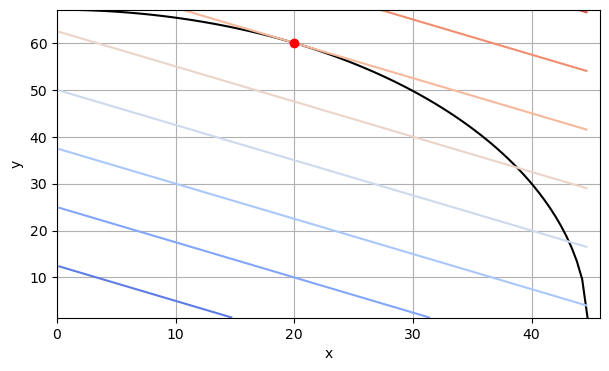

In [10]:
a = np.sqrt(2000)
x = np.linspace(0.1, a - 0.01, 100)
y = 0.5*np.sqrt(18000 - 9*x**2)

delta = 0.25
X, Y = np.meshgrid(x, y)
c = np.array([3, 4])
Z = c[0]*X + c[1]*Y

plt.figure(figsize=(7, 4))
plt.plot(x, y, '-k')
CS = plt.contour(X, Y, Z, cmap='coolwarm')
plt.plot(20, 60, 'or')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, a + 1)
plt.grid(True)

## Aufgabe 13: Produktionsmöglichkeitenkurve und optimaler Produktionsplan, Lagrange-Multiplikatoren

Ein Unternehmen produziert $x$ Einheiten von Produkt A und $y$ Einheiten von Produkt B und hat die  Produktionsmöglichkeitskurve $4x^2 + 25y^2 = 50 000$. Die Profite sind 2 EUR pro Einheit von Produkt A und 10 EUR pro Einheit von Produkt B. Bestimmen Sie den Produktionsplan maximalen Gesamtprofits und den dazugehörigen maximalen Gesamtprofit.

### Lösung

Maximiere $f(x,y) = 2x + 10y$ unter $g(x,y) = 4x^2 + 25y^2 - 50000 = 0$. Die Methode der Lagrange-Multiplikatoren liefert die optimalen Werte $x$=50 und $y$=40.

## Aufgabe 14: Preisdifferenzierung, nicht-lineare Optimierung mit und ohne Nebenbedingungen

Eine Firma vermarktet ein Produkt in zwei Ländern mit unterschiedlichen Mengen.
Sei $x$ die Stückzahl, die im ersten Land verkauft werden soll, und $y$ die Stückzahl, die im zweiten Land verkauft werden soll.
Um die Stückzahlen $x$ und $y$ vollständig absetzen zu können, muss die Firma den Verkaufspreis im ersten Land auf $97 - \frac{x}{10}$ EUR/Stück und im zweiten Land auf $83 - \frac{y}{20}$ EUR/Stück festlegen. Diese Funktionen werden Preis-Absatz-Funktion oder [Nachfragefunktion](https://de.wikipedia.org/wiki/Nachfragefunktion) genannt.
Die Kosten für die Herstellung betragen $20000 + 3(x + y)$ EUR.

1. Bestimmen Sie jene Stückzahlen $x$ und $y$, die den [Gewinn](https://de.wikipedia.org/wiki/Gewinn) (= Profit, = Umsatz(=Erlös) minus Kosten) maximieren. Bestimmen Sie diesen maximalen Gewinn.
2. Angenommen, die Firma muss in jedem Land den selben Preis festlegen, d. h. $97 -\frac{x}{10} = 83 -\frac{y}{20}$. Bestimmen Sie die Werte von $x$ und $y$, die den Gewinn unter dieser Einschränkung maximieren. Bestimmen Sie diesen maximalen Gewinn. Warum ist er niedriger als vorher?

*Link:* [Wikipedia: Preisdifferenzierung](https://de.wikipedia.org/wiki/Preisdifferenzierung) 

### Lösung

*Quelle:* Goldstein, Lay, Asmar, Schneider: "Calculus & its Applications": example 2 auf Seite 397 und exercise 16  auf Seite 409

1. Die Zielfunktion (Gewinn = Erlös - Kosten) lautet $f(x,y)= (97 - \frac{x}{10})x + (83 - \frac{y}{20})y - \left[ 20000 + 3(x + y)\right] = 94x - \frac{x^2}{10} + 80y - \frac{y^2}{20} - 20000$. Die Optimalitätsbedingung $\nabla f = 0$ liefert ein lineares Gleichungssystem, dessen Lösung $x=470$ und $y=800$ den einzigen kritischen Punkt ergibt. Die Hesse-Matrix $H=\begin{pmatrix} -\frac{1}{5} & 0 \\ 0 & -\frac{1}{10} \end{pmatrix}$ ist negativ definit. Daher ist der kritische Punkt $(x,y)=(470,800)$ ein lokales Maximum. Der zugehörige Gewinn $f(470,800)$ hat den Wert 34090 EUR. Siehe auch Code.
2. Zur Zielfunktion $f(x,y) = 94x - \frac{x^2}{10} + 80y - \frac{y^2}{20} - 20000$ kommt noch die Nebenbedingung $g(x,y) = (97 - \frac{x}{10}) - (83 - \frac{y}{20}) = 0$ dazu. Die Optimalitätsbedingung $\nabla f = \lambda\nabla g$ liefert ein lineares Gleichungssystem, dessen Lösung die optimalen Werte $x \simeq 516.7$ und $y \simeq 753.3$ liefert. Der zugehörige Gewinn hat den niedrigeren Wert von 33763.33 EUR. Siehe auch Code.

In [3]:
def gewinn(x, y):
    return (97 - x/10)*x + (83 - y/20)*y - (20000 + 3*(x + y))

print('Aufgabe 1:')
x = 470
y = 800
print(f'  {x = :.2f}')
print(f'  {y = :.2f}')
print(f'  Gewinn = {gewinn(x, y):.2f} EUR')

print('Aufgabe 2:')
lbd = 7*40/3
x = 470 + lbd/2
y = 800 - lbd/2
print(f'  {x = :.2f}')
print(f'  {y = :.2f}')
print(f'  Gewinn = {gewinn(x, y):.2f} EUR')

Aufgabe 1:
  x = 470.00
  y = 800.00
  Gewinn = 34090.00 EUR
Aufgabe 2:
  x = 516.67
  y = 753.33
  Gewinn = 33763.33 EUR


## Aufgabe 15: Energieversorgungsnetz, Lagrange-Multiplikatoren

Drei Generatoren mit folgenden Kostenfunktionen in EUR/Stunde sollen eine Gesamtlast von 952 MW decken.

$$\begin{align}
   f_1(x_1) &= x_1 + 0.0625 x_1^2 \\
   f_2(x_2) &= x_2 + 0.0125 x_2^2 \\
   f_3(x_3) &= x_3 + 0.0250 x_3^2
\end{align}$$

Die Variable $x_i$ ist die Ausgangsleistung in MW des $i$-ten Generators.
Die Funktion $f_i$ gibt die Kosten pro Stunde des $i$-ten Generators an.
Die Kostenfunktionen $f_i$ wurden z.B. durch einen Polynom-Fit basierend auf den historischen Betriebsdaten erstellt.

1. Berechnen Sie den optimale Generatoreneinsatz, d.h. die optimalen Werte der $x_i$ Variablen, so dass die Gesamtkosten pro Stunde minimal sind und die Gesamtlast gedeckt ist.
2. Berechnen Sie die entsprechenden optimalen Gesamtkosten pro Stunde.

### Lösung

Die Zielfunktion lautet $f(x_1, x_2, x_3) = f_1(x_1) + f_2(x_2) + f_3(x_3)$. Die Nebenbedingung schreiben wir als $g(x_1, x_2, x_3) = x_1 + x_2 + x_3 - 952 = 0$. Dann liefert die Optimalitätsbedingung $\nabla f = \lambda\nabla g$ ein lineares Gleichungssystem, dessen Lösung die optimalen Werte der $x_i$ enthält, siehe Code.

In [15]:
def Kosten(x):
    return x[0] + 0.0625*x[0]**2 + x[1] + 0.0125*x[1]**2 + x[2] + 0.0250*x[2]**2

A = np.array([[0.125, 0, 0, -1],
              [0, 0.025, 0, -1],
              [0, 0, 0.050, -1],
              [1, 1,     1,  0]])
b = np.array([-1, -1, -1, 952])
x = la.solve(A, b)

print(f'x = {x[:3]}')
print(f'lambda = {x[3]}')
print(f'Kosten = {Kosten(x[:3]):.2f} EUR/Stunde')

x = [112. 560. 280.]
lambda = 15.0
Kosten = 7616.00 EUR/Stunde


*Bemerkung:* Der Wert des Lagrange-Multiplikators (auch Schattenpreis genannt) ist die Rate, mit welcher der sich der optimale Zielfunktionswert ändert, wenn man die Randbedingungen ändert:

In [16]:
A = np.array([[0.125, 0, 0, -1],
              [0, 0.025, 0, -1],
              [0, 0, 0.050, -1],
              [1, 1,     1,  0]])
b = np.array([-1, -1, -1, 952 + 1])  # Achtung: 952 + 1
x = la.solve(A, b)
print(f'Kosten = {Kosten(x[:3]):.2f} EUR/Stunde')

Kosten = 7631.01 EUR/Stunde


## Aufgabe 16: Ausgleichsgerade

Nehmen wir an, dass die Werte $f(x_1)=f_{1},...,f(x_N)=f_N$ bekannt sind, z. B. können sie experimentelle Referenzpunkte sein. Und nehmen wir an, wir wollen die beste lineare Anpassung $F(x)=ax+b$ an diese Daten finden, die so gut ist, dass der gesamte quadratische Fehler $E$ minimiert wird  

$$E(a,b)=\sum_{j=1}^{N}(F(x)-f_{j})^2 \rightarrow \min$$  

Zeigen Sie  

$$a=\frac{N\sum_{j=1}^{N}x_jf_j-(\sum_{j=1}^{N}f_j)(\sum_{j=1}^{N}x_j)}{N\sum_{j=1}^{N}x_{j}^2-(\sum_{j=1}^{N}x_j)^2}$$  
$$b=\frac{(\sum_{j=1}^{N}x_j^2)(\sum_{j=1}^{N}f_j)-(\sum_{j=1}^{N}x_j)(\sum_{j=1}^{N}x_jf_j)}{N\sum_{j=1}^{N}x_{j}^2-(\sum_{j=1}^{N}x_j)^2}$$  

*Hinweis:* Machen Sie sich klar, dass der Fehler $E$ von $a$ und $b$ abhängt. Differenzieren Sie die Funktion partiell nach $a$ unb $b$ und lösen Sie schließlich das resultierende Gleichungssystem. Um Schreibarbeit zu sparen, bietet es sich an, an geeigneter Stelle die Summen durch Buchstaben Ihrer Wahl zu ersetzen.

### Lösung

$$\begin{align}
\frac{\partial E(a,b)}{\partial a}=\sum_{j=1}^{N}2(ax_j+b-f_j)x_j &= 0\\
a\sum_{j=1}^{N}x_j^2+b\sum_{j=1}^{N}x_j-\sum_{j=1}^{N}f_jx_j&=0
\end{align}$$

$$\begin{align}
\frac{\partial E(a,b)}{\partial b}=\sum_{j=1}^{N}2(ax_j+b-f_j)&=0\\
a\sum_{j=1}^{N}x_j+b\sum_{j=1}^{N}1-\sum_{j=1}^{N}f_j &=0
\end{align}$$

Wir setzen:

$$p:=\sum_{j=1}^{N}x_j$$
$$q:=\sum_{j=1}^{N}x_{j}^{2}$$
$$h:=\sum_{j=1}^{N}f_j$$
$$g:=\sum_{j=1}^{N}f_jx_j$$

Einsetzen in die oberen Bedingungen liefert

$$aq+bp-g=0$$  
$$ap+bN-h=0$$

Aus der ersten folgt

$$a=\frac{g-bp}{q}$$

Einsezten in die zweite liefert  

$$b=\frac{hq-gp}{Nq-p^2}=\frac{(\sum_{j=1}^{N}x_j^2)(\sum_{j=1}^{N}f_j)-(\sum_{j=1}^{N}x_j)(\sum_{j=1}^{N}x_jf_j)}{N\sum_{j=1}^{N}x_{j}^2-(\sum_{j=1}^{N}x_j)^2}$$

Einsetzen von b in $a=\frac{g-bp}{q}$ liefert  

$$a=\frac{Ng-ph}{Nq-p^2}=\frac{N\sum_{j=1}^{N}x_jf_j-(\sum_{j=1}^{N}f_j)(\sum_{j=1}^{N}x_j)}{N\sum_{j=1}^{N}x_{j}^2-(\sum_{j=1}^{N}x_j)^2}$$

## Aufgabe 17: Minimale Materialkosten

Nehmen wir an, wir wollen eine zylindrische Suppendose aus Blech mit einem Preis von $\alpha$ Cent pro Flächeneinheit und einem vorgegebenen Volumen $V$ entwerfen, wobei die Materialkosten minimiert werden sollen. Wenn $x$ der Radius und $y$ die Höhe ist, haben wir das Optimierungsproblem

$$f(x,y)=\alpha(2\pi x^2+2\pi xy) \rightarrow \min$$

mit der Nebenbedingung

$$V=\pi x^2y$$  

1. Skizieren Sie die zylindrische Dose mit Radius $x$ und Höhe $y$. Überlegen Sie sich, wie die Kostenfunktion und die Nebenbedingung zustande kommen.
2. Lösen Sie $x$ und $y$ mit der Eliminationsmethode, und zeigen Sie, dass $x = \sqrt[3]{ \frac{V}{2\pi} }$ und $y = 2 \sqrt[3]{ \frac{V}{2\pi} }$ ist.
3. Lösen Sie $x$ und $y$ mit der Lagrange-Methode.

### Lösung

ad 1.:

![MinCostDose.png](../abbildungen/MinCostDose.png)

$$\alpha A=\alpha(A_1+A_2+A_3) = \alpha(2\pi x^2 + 2\pi xy)$$

ad 2.:

$$\begin{align}
y &= \frac{V}{\pi x^2}\\
f(x,y) &= \alpha(2\pi x^2+2\pi x(\frac{V}{\pi x^2}))\\
f(x,y) &= \alpha(2\pi x^2+\frac{2V}{x})\\
\frac{d f(x,y)}{d x} &=4 \alpha\pi x-\frac{2\alpha V}{x^2}=0\\
x &= \sqrt[3]{ \frac{V}{2\pi} }\\
V &= \pi x^2y = \pi (\frac{V}{2\pi})^{\frac{1}{3}}y\\
y &= 2 \sqrt[3]{ \frac{V}{2\pi} }
\end{align}$$

ad 3.:

$$\begin{align}
g(x,y) &= \pi x^2y-V\\
\nabla f(x,y)&=\left(\begin{array}{c}
\alpha(4\pi x+2\pi y)\\
\alpha(2x\pi)\\
\end{array}\right)\\
\nabla g(x,y)&=\left(\begin{array}{c}
2\pi xy\\
\pi x^2\\
\end{array}\right)\\
\nabla f(x,y) &= \lambda\nabla g(x,y)
\end{align}$$

Aus dieser Bedingung können die folgenden zwei Gleichungen gewnonnen werden

$$\begin{align}
2\alpha x+\alpha y&= \lambda xy\\
2\alpha &= \lambda x
\end{align}$$

Aus der zweiten folgt  

$$x = \frac{2\alpha}{\lambda}$$

Einsetzen in die erste liefert  

$$y = \frac{4\alpha}{\lambda}$$

Einsetzten von $x$ und $y$ in die Nebenbedingung $V=\pi x^2y$ liefert dann

$$\lambda = \sqrt[3]{ \frac{16\pi}{V} }\alpha$$

Einsetzten von $\lambda$ in die oberen Gleichungen für $x$ und $y$ ergibt schließlich

$$\begin{align}
x &= \sqrt[3]{ \frac{V}{2\pi} }\\
y &= 2 \sqrt[3]{ \frac{V}{2\pi} }
\end{align}$$

## Aufgabe 18: Lagrange-Multiplikatoren, Konturplot

Gegeben sei die folgende Aufgabe:

$$ \max x + y \\
\text{s.t. } x^2 + y^2 = 1$$

1) Lösen Sie das Problem mit der Methode der Lagrange-Multiplikatoren.
2) Plotten Sie die durch die Nebenbedingung erlaubte Menge an $(x, y)$-Punkten, die Höhenlinien der Zielfunktion und die Gradienten der Zielfunktion und der Nebenbedingung (jeweils als Pfeil dargestellt) im Optimum. Interpretieren und beschreiben Sie diesen Plot.

*Hinweis:* Verwenden Sie für die Höhenlinien die Funktion `countour` und für die Pfeildarstellung `arrow` aus `matplotlib.pyplot`. 

### Lösung

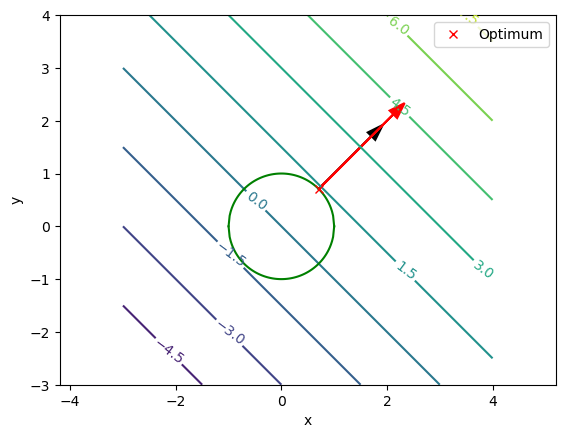

In [2]:
# 1)
# x = 1/sqrt(2) , y = 1/sqrt(2)

# 2)
x = np.linspace(-3, 4, 200)
y = np.linspace(-3, 4, 200)
X, Y = np.meshgrid(x, y)
F = X + Y

CS = plt.contour(X, Y, F, 10)
plt.clabel(CS, inline=True, fontsize=10)


def circ(x, u):
    return u*np.sqrt(1 - x**2)


x = np.linspace(-1 , 1, 100)

plt.plot(x, circ(x, 1), "g")
plt.plot(x, circ(x, -1), "g");

plt.arrow(1/np.sqrt(2), 1/np.sqrt(2), 1, 1, 
          linewidth = 1.5, color='black', head_width=0.2)
plt.arrow(1/np.sqrt(2), 1/np.sqrt(2), 2*(1/np.sqrt(2)), 2*(1/np.sqrt(2)), 
          linewidth = 1.5, color='red', head_width=0.2)

plt.plot(1/np.sqrt(2), 1/np.sqrt(2), "rx", label="Optimum")

plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.legend();

## Aufgabe 19: Optimale Beleuchtung

Ein fester Punkt $A$ einer ebenen Bühne wird durch eine in der Höhe $h$ verstellbare punktförmige Lichtquelle $L$ mit der konstaten Lichstärke $I_0$ beleuchtet. 

![BspLicht.png](../abbildungen/BspLicht.png)

Die von der Lichtquelle $L$ im Punkt $A$ erzeugte Beleuchtungsstärke $B$ genügt dabei dem Lambertschen Gesetz

$$B(\alpha, r) = \frac{I_0 \cos(\alpha)}{r^2}$$

$\alpha$ ist der Einfallswinkel des Lichtes, $r$ der Abstand zwischen der Lichtquelle $L$ und dem Bühnenpunkt $A$ und $a$ der Abstand des Bühnenpunktes $A$ vom Fußpunkt der Lichtquelle $L$. Unter welchem Winkel $\alpha$ wird dieser Punkt optimal beleuchtet?

*Hinweis:* Finden Sie eine Beziehung zwischen $\alpha$ und $r$ (dies ist dann Ihre Nebenbedingung). Wenden Sie dann die Methode der Lagrange-Multiplikatoren an, um das Problem zu lösen. $\frac{\sin(\alpha)}{\cos(\alpha)} = \tan(\alpha)$ könnte ebenfalls hilfreich sein.

### Lösung

Aus der Grafik etnehmen wir $\sin(\alpha) = \frac{a}{r} \implies r\sin(\alpha) - a = 0$. Das ist unsere Nebenbedingung. Am Optimum ist der Gradient der Zielfunktion ein skalares vielfaches des Gradienen der Nebenbedingung, daher:

$$ \left(
\begin{array}{c}
-\frac{I_0\sin(\alpha)}{r^2}\\
-\frac{2 I_0 \cos(\alpha)}{r^3}\\
\end{array}
\right) =  \lambda\left(
\begin{array}{c}
r\cos(\alpha)\\
\sin(\alpha)\\
\end{array}
\right)$$

Damit haben wir:

$$\lambda = \frac{-I_0 \sin(\alpha)}{r^3\cos(\alpha)} = \frac{-2I_0 \cos(\alpha)}{r^3 \sin(\alpha)}$$
$$\sin(\alpha)^2 = 2\cos(\alpha)^2$$
$$\tan(\alpha)^2 = 2 \implies \tan(\alpha) = \pm \sqrt{2} \implies \alpha = 54,74°$$

## Aufgabe 20: Fermatsches Prinzip

Es sei eine Lichtquelle an einem Punkt $A$ in einem Medium, in dem die Lichtgeschwindigkeit $v_1$ ist, gegeben. Von den von $A$ ausgehenden Strahlen interessiert uns derjenige, der an einem gegebenen Punkt $B$ in einem zweiten Medium ankommt, in dem die Lichtgeschwindigkeit $v_2$ ist, wobei die Grenzfläche zwischen den beiden Medien die Ebene $P$ ist. 

![Brechungsgesetz.png](../abbildungen//Brechungsgesetz.png)

[Fermats Grundprinzip der Optik](https://de.wikipedia.org/wiki/Fermatsches_Prinzip) besagt, dass von allen möglichen Wegen derjenige tatsächlich beschritten wird, der so beschaffen ist, dass die Zeit $T$ von $A$ nach $B$ ein Minimum ist, daher:  

$$T(\alpha, \beta) = \frac{a}{v_1 \cos(\alpha)} + \frac{b}{v_2 \cos(\beta)} \rightarrow \text{Minimum}$$
$$g(\alpha, \beta) = a \tan(\alpha) + b \tan(\beta) = \text{konstant}$$

Lösen Sie dieses Problem mit der Methode der Lagrange-Multiplikatoren und leiten Sie daraus das Brechungsgesetz $\frac{\sin(\alpha)}{\sin(\beta)} = \frac{v_1}{v_2}$ ab .

### Lösung

$$\nabla T(\alpha, \beta) = \lambda\nabla g(\alpha, \beta)$$
$$ \left(
\begin{array}{c}
\frac{a\sin(\alpha)}{v_1\cos(\alpha)^2}\\
\frac{b\sin(\beta)}{v_2\cos(\beta)^2}\\
\end{array}
\right)  = \lambda\left(
\begin{array}{c}
\frac{a}{\cos(\alpha)^2}\\
\frac{b}{\cos(\beta)^2}\\
\end{array}
\right)$$

$$\lambda v_1 = \sin(\alpha)$$
$$\lambda v_2 = \sin(\beta)$$

$$\frac{\sin(\alpha)}{\sin(\beta)} = \frac{v_1}{v_2}$$

## Aufgabe 21: Minimaler Materialverbrauch

Wie muss man den Öffnungswinkel $\alpha$ eines kegelförmigen Trichters vom Volumen $V_0 = 10$ dm$^3$ wählen, damit der Materialverbrauch für die Mantelfläche möglichst klein wird?

*Hinweis:* Der Mantel soll aus einem homogenen Blech konstanter Dicke hergestellt werden. Verwenden Sie die Methode der Lagrange-Multiplikatoren und stellen Sie die Zielfunktion und die Nebenbedingung als Funktion des Radius $r$ und des Winkels $\alpha$ dar.

![Trichter2.png](../abbildungen/Trichter2.png)

### Lösung

Wir deffinieren $\beta := \frac{\alpha}{2}$. Aus der Skizze entnehmen wir $\sin(\beta) = \frac{r}{s}$ und $\tan(\beta) = \frac{r}{h}$. Das Volumen des Kegels ist gegeben durch $V = \frac{1}{3}h\pi r^2$ und die Matelfläche durch $M = \pi r s$. Dies gibt die Zielfunktion und die Nebenbedingung als:

$$f(r,\beta) = \frac{\pi r^2}{\sin(\beta)}$$
$$g(r,\beta) = \frac{r^3 \pi}{3\tan(\beta)} - V_0$$

Am Optimum ist der Gradient der Zielfunktion ein skalares Vielfaches des Gradienten der Nebenbedingung, damit gilt:

$$\left(
\begin{array}{c}
\frac{2\pi r}{\sin(\beta)}\\
-\frac{\pi r^2\cos(\beta)}{\sin(\beta)^2}\\
\end{array}
\right) = \lambda\left(
\begin{array}{c}
\frac{\pi r^2}{\tan(\beta)}\\
-\frac{\pi r^3}{3\tan(\beta)^2\cos(\beta)^2}\\
\end{array}
\right)$$

Daraus gewinnen wir:

$$\lambda = \frac{3\cos(\beta)}{r} = \frac{2}{r\cos(\beta)}$$

also

$$\cos(\beta)^2 = \frac{2}{3} \implies \cos(\beta) = \sqrt{\frac{2}{3}} \implies \beta = 35,26°$$